In [47]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# setting options
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

In [48]:
# loading and viewing the dataset
df = pd.read_csv('data.csv', sep=',')
df.tail(10)

,Country,Year,Life expectancy at birth (years),GDP
86,Zimbabwe,2006,45.40,5443896500.00
87,Zimbabwe,2007,46.60,5291950100.00
88,Zimbabwe,2008,48.20,4415702800.00
89,Zimbabwe,2009,50.00,8621573608.00
90,Zimbabwe,2010,52.40,10141859710.00
91,Zimbabwe,2011,54.90,12098450749.00
92,Zimbabwe,2012,56.60,14242490252.00
93,Zimbabwe,2013,58.00,15451768659.00
94,Zimbabwe,2014,59.20,15891049236.00
95,Zimbabwe,2015,60.70,16304667807.00


In [49]:
# renaming columns
df.rename(columns={
    'Country': 'country',
    'Year': 'year',
    'Life expectancy at birth (years)': 'life_expectancy',
    'GDP': 'gdp'
}, inplace=True)

In [50]:
# inspecting the dataset
print(df.shape)
print()
print(df.columns)
print()
print(df.info())
print()
print(df['country'].unique().tolist())

(96, 4)

Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


There are six counties in dataset: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe'. There is no missing data in the dataset.

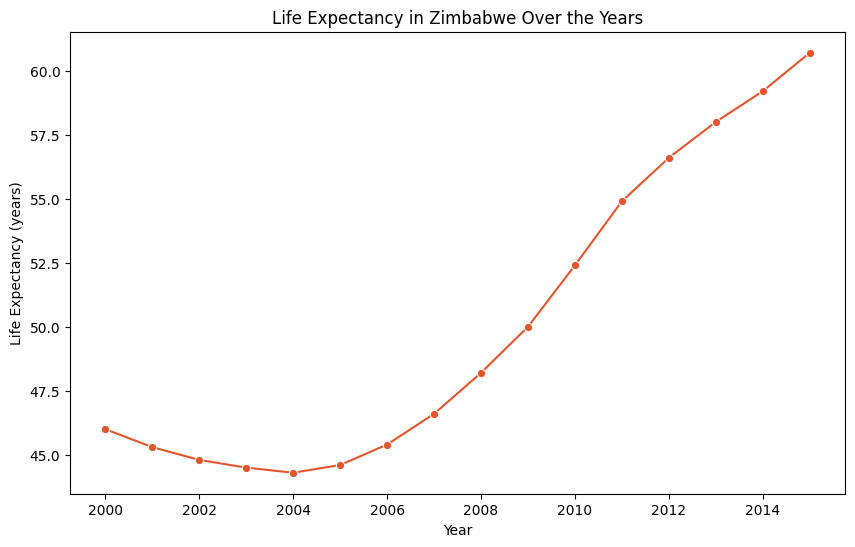

In [57]:
# creting a plot showing life expectancy by year
filt_country = (df['country'] == 'Zimbabwe')
zimbabwe = df[filt_country]
plt.figure(figsize=(10, 6), frameon=True)
sns.lineplot(data=zimbabwe, x='year', y='life_expectancy', marker='o', linestyle='-', color='#E2552D')
plt.title('Life Expectancy in Zimbabwe Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')

# plt.plot(data=zimbabwe, x='year', y='life_expectancy', marker='o', linestyle='-', color='#E2552D')
plt.show()
